In [ ]:
#Importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
data = pd.read_csv('cleaned_dataset_for_model.csv')

print(data.head())


   first    last           cc_num       category  category_spent  \
0  Aaron  Murray  376028110684021  entertainment         2056.16   
1  Aaron  Murray  376028110684021  gas_transport         1263.58   
2  Aaron  Murray  376028110684021    grocery_pos         4290.75   
3  Aaron  Murray  376028110684021       misc_net         2545.19   
4  Aaron  Murray  376028110684021       misc_pos         1134.09   

   category_rewards  reward_efficiency  total_spent  total_rewards  
0          10280.80                5.0     38126.14      105752.87  
1           5054.32                4.0     38126.14      105752.87  
2          12872.25                3.0     38126.14      105752.87  
3           5090.38                2.0     38126.14      105752.87  
4           1134.09                1.0     38126.14      105752.87  


In [ ]:
# Encode categorical columns
data['first'] = data['first'].astype('category').cat.codes
data['last'] = data['last'].astype('category').cat.codes
data['category'] = data['category'].astype('category').cat.codes

print(data.head())


   first  last           cc_num  category  category_spent  category_rewards  \
0      0   300  376028110684021         0         2056.16          10280.80   
1      0   300  376028110684021         1         1263.58           5054.32   
2      0   300  376028110684021         2         4290.75          12872.25   
3      0   300  376028110684021         3         2545.19           5090.38   
4      0   300  376028110684021         4         1134.09           1134.09   

   reward_efficiency  total_spent  total_rewards  
0                5.0     38126.14      105752.87  
1                4.0     38126.14      105752.87  
2                3.0     38126.14      105752.87  
3                2.0     38126.14      105752.87  
4                1.0     38126.14      105752.87  


In [ ]:
# features (X) and target (y)
X = data[['first', 'last', 'cc_num', 'category', 'category_spent', 'reward_efficiency', 'total_spent']]
y = data['total_rewards']


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5880, 7) (1470, 7) (5880,) (1470,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 91463.47332111394
R-squared: 0.9998252442674735


In [ ]:
import joblib

joblib.dump(model, 'reward_prediction_model.pkl')
print('Model saved as reward_prediction_model.pkl')


Model saved as reward_prediction_model.pkl


In [ ]:
# Example of new data
new_data = pd.DataFrame({
    'first': [1],
    'last': [2],
    'cc_num': [1234567890123456],
    'category': [3],
    'category_spent': [200.00],
    'reward_efficiency': [2.5],
    'total_spent': [1000.00]
})

new_data_scaled = scaler.transform(new_data)

# Prediction
predicted_rewards = model.predict(new_data_scaled)
print(f'Predicted Rewards: {predicted_rewards[0]}')


Predicted Rewards: 4177.104599999998


In [ ]:
# feature importances
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


             Feature  Importance
6        total_spent    0.928240
2             cc_num    0.024179
1               last    0.022818
0              first    0.022786
4     category_spent    0.001841
3           category    0.000083
5  reward_efficiency    0.000052


In [ ]:
from sklearn.model_selection import cross_val_score

# cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# mean and standard deviation
print(f"Cross-validation MSE: {cv_scores.mean()} (+/- {cv_scores.std()})")


Cross-validation MSE: -965967.916523901 (+/- 527849.3292924613)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: -877411.2008989124


In [ ]:
loaded_model = joblib.load('reward_prediction_model.pkl')

# Predict for new data
new_data = pd.DataFrame({
    'first': [1],
    'last': [2],
    'cc_num': [1234567890123456],
    'category': [3],
    'category_spent': [200.00],
    'reward_efficiency': [2.5],
    'total_spent': [1000.00]
})

new_data_scaled = scaler.transform(new_data)
predicted_rewards = loaded_model.predict(new_data_scaled)
print(f"Predicted Rewards: {predicted_rewards[0]}")


Predicted Rewards: 4177.104599999998


In [40]:
!pip install lightgbm

In [43]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder_first = LabelEncoder()
label_encoder_last = LabelEncoder()
label_encoder_category = LabelEncoder()

X_train['first'] = label_encoder_first.fit_transform(X_train['first'])
X_train['last'] = label_encoder_last.fit_transform(X_train['last'])
X_train['category'] = label_encoder_category.fit_transform(X_train['category'])


def transform_with_unseen_labels(encoder, series):

    return series.apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1)

X_test['first'] = transform_with_unseen_labels(label_encoder_first, X_test['first'])
X_test['last'] = transform_with_unseen_labels(label_encoder_last, X_test['last'])
X_test['category'] = transform_with_unseen_labels(label_encoder_category, X_test['category'])

print(X_train.dtypes)
print(X_test.dtypes)

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
lgb_mse = mean_squared_error(y_test, lgb_pred)
lgb_r2 = r2_score(y_test, lgb_pred)

print(f'LightGBM Mean Squared Error: {lgb_mse}')
print(f'LightGBM R-squared: {lgb_r2}')


first                  int64
last                   int64
cc_num                 int64
category               int64
category_spent       float64
category_rewards     float64
reward_efficiency    float64
total_spent          float64
dtype: object
first                  int64
last                   int64
cc_num                 int64
category               int64
category_spent       float64
category_rewards     float64
reward_efficiency    float64
total_spent          float64
dtype: object
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1519
[LightGBM] [Info] Number of data points in the train set: 5880, number of used features: 8
[LightGBM] [Info] Start training from score 35015.088754
LightGBM Mean Squared Error: 31963817.84539126
LightGBM R-squared: 0.9389279654589351


In [59]:
print(f'Random Forest Mean Squared Error: {mse}')
print(f'Random Forest R-squared: {r2}')


Random Forest Mean Squared Error: 91463.47332111394
Random Forest R-squared: 0.9998252442674735


In [82]:
from google.colab import files
files.download('lightgbm_model.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

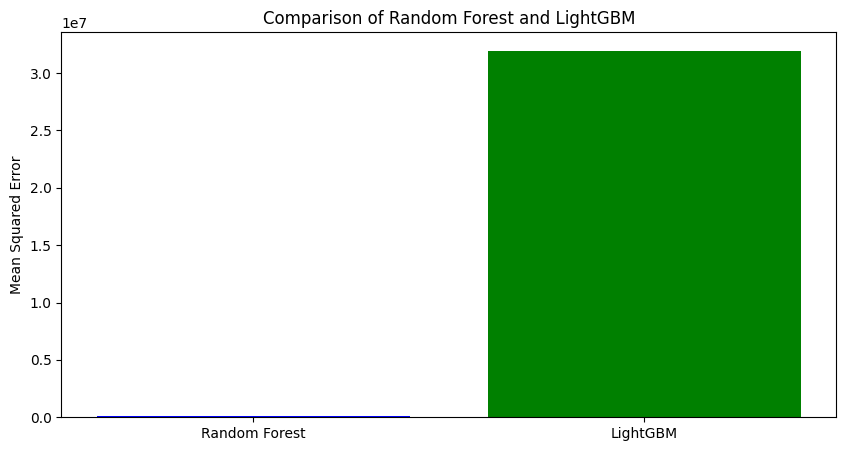

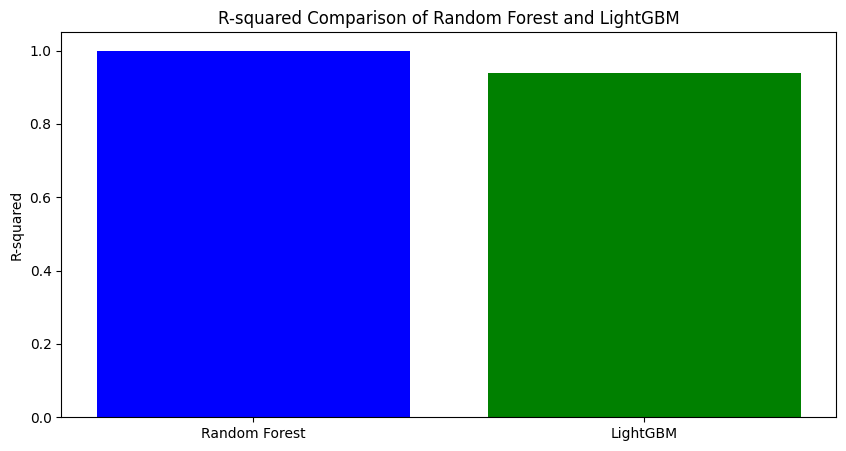

In [60]:
models = ['Random Forest', 'LightGBM']
mse_values = [mse, lgb_mse]
r2_values = [r2, lgb_r2]

plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color=['blue', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Random Forest and LightGBM')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color=['blue', 'green'])
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Random Forest and LightGBM')
plt.show()


In [62]:
pip install xgboost

In [64]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [68]:
label_encoder_first = LabelEncoder()
label_encoder_last = LabelEncoder()
label_encoder_category = LabelEncoder()

X_train['first'] = label_encoder_first.fit_transform(X_train['first'])
X_train['last'] = label_encoder_last.fit_transform(X_train['last'])
X_train['category'] = label_encoder_category.fit_transform(X_train['category'])

def safe_transform(encoder, column_data):
    try:
        return encoder.transform(column_data)
    except ValueError:
        return encoder.transform([encoder.classes_[-1]] * len(column_data))

X_test['first'] = label_encoder_first.transform(X_test['first'])
X_test['last'] = safe_transform(label_encoder_last, X_test['last'])
X_test['category'] = safe_transform(label_encoder_category, X_test['category'])

In [92]:
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)


In [91]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, verbosity=0, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [74]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 71005714.62379222
R-squared: 0.8643321183629354


In [75]:
model.save_model('xgboost_model.json')


In [76]:
model = xgb.XGBRegressor()
model.load_model('xgboost_model.json')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1519
[LightGBM] [Info] Number of data points in the train set: 5880, number of used features: 8
[LightGBM] [Info] Start training from score 35015.088754
Random Forest - MSE: 51758105.58724506, R²: 0.9011077829471462
LightGBM - MSE: 50233163.9260925, R²: 0.9040214301920871
XGBoost - MSE: 71005714.62379222, R²: 0.8643321183629354


<Figure size 800x600 with 0 Axes>

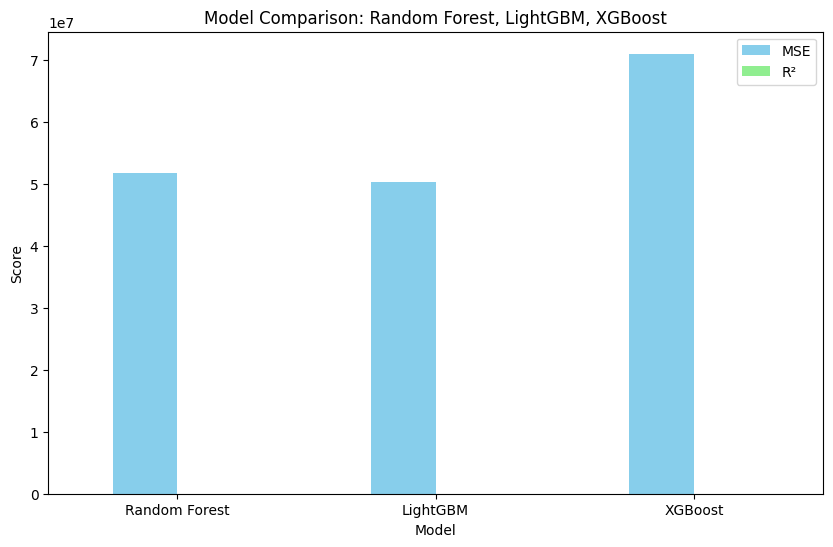

           Model           MSE        R²
0  Random Forest  5.175811e+07  0.901108
1       LightGBM  5.023316e+07  0.904021
2        XGBoost  7.100571e+07  0.864332


In [89]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
lgb_mse = mean_squared_error(y_test, lgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

rf_r2 = r2_score(y_test, rf_pred)
lgb_r2 = r2_score(y_test, lgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"Random Forest - MSE: {rf_mse}, R²: {rf_r2}")
print(f"LightGBM - MSE: {lgb_mse}, R²: {lgb_r2}")
print(f"XGBoost - MSE: {xgb_mse}, R²: {xgb_r2}")

comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'LightGBM', 'XGBoost'],
    'MSE': [rf_mse, lgb_mse, xgb_mse],
    'R²': [rf_r2, lgb_r2, xgb_r2]
})

plt.figure(figsize=(8,6))
comparison_df.set_index('Model').plot(kind='bar', y=['MSE', 'R²'], color=['skyblue', 'lightgreen'], figsize=(10, 6))
plt.title('Model Comparison: Random Forest, LightGBM, XGBoost')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.show()

print(comparison_df)


<Figure size 1000x600 with 0 Axes>

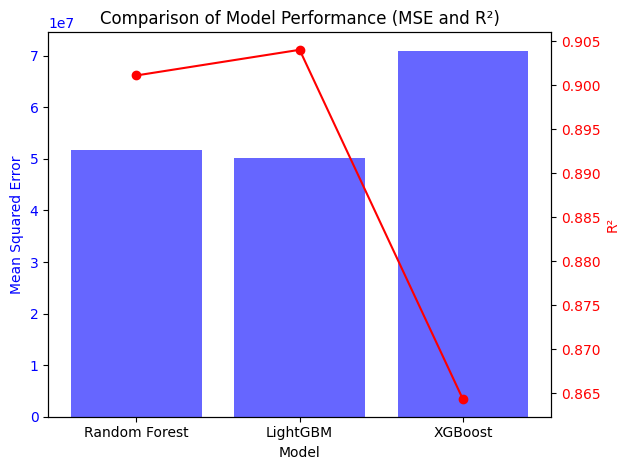

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

results = pd.DataFrame({
    'Model': ['Random Forest', 'LightGBM', 'XGBoost'],
    'MSE': [51758105.58724506, 50233163.9260925, 71005714.62379222],
    'R²': [0.9011077829471462, 0.9040214301920871, 0.8643321183629354]
})

plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots()

ax1.bar(results['Model'], results['MSE'], color='b', alpha=0.6, label='MSE')
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(results['Model'], results['R²'], color='r', marker='o', label='R²')
ax2.set_ylabel('R²', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Comparison of Model Performance (MSE and R²)')
plt.tight_layout()
plt.show()
